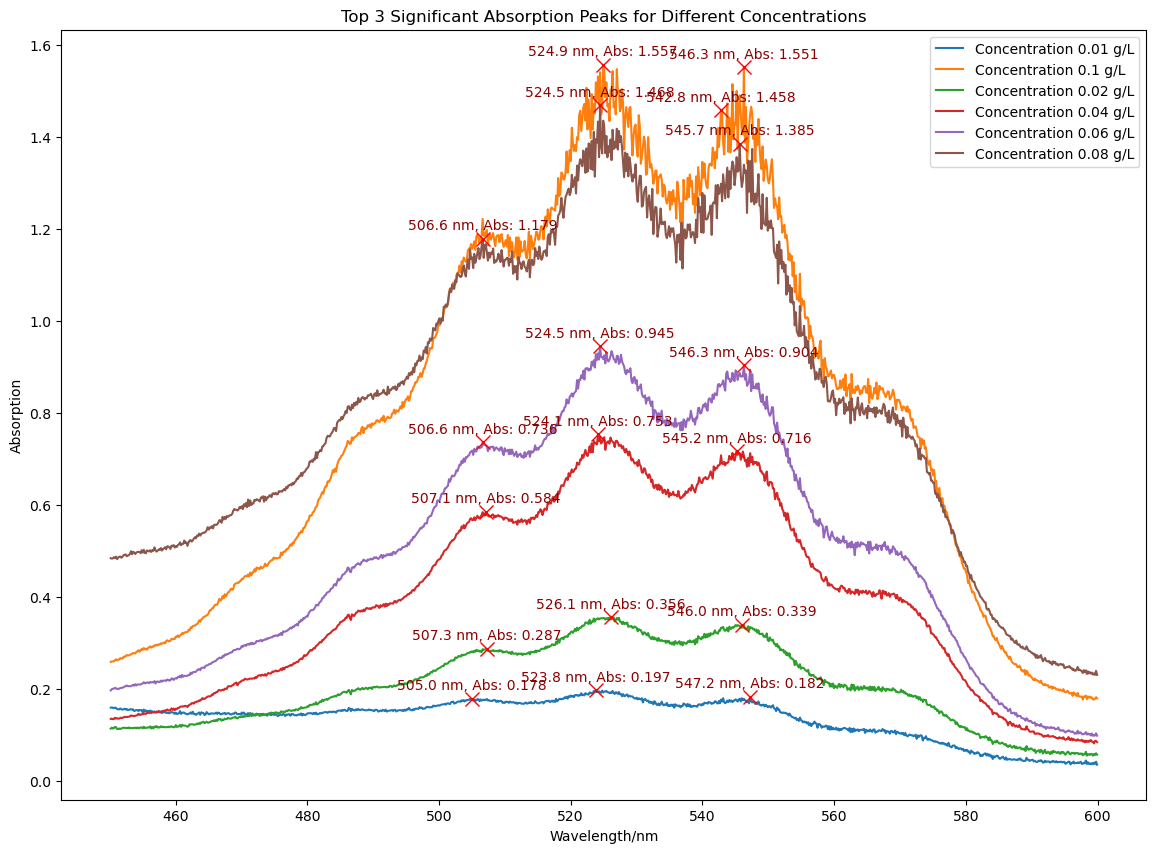

In [8]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

# 读取Excel文件
data = pd.read_excel('BeerData.xlsx')

# 设置图形大小
plt.figure(figsize=(14, 10))

# 循环处理每个浓度，并绘制对应的图形
for concentration in data.columns[1:]:
    absorption = data[concentration]
    wavelength = data['Wavelength [nm]']
    
    # 限定波长范围450到600纳米
    mask = (wavelength >= 450) & (wavelength <= 600)
    absorption_filtered = absorption[mask]
    wavelength_filtered = wavelength[mask]
    
    # 寻找吸收峰值，调整distance和prominence参数
    peaks, properties = find_peaks(absorption_filtered, prominence=0.01, distance=20)
    
    # 如果找到的峰值多于3个，选择吸收率最高的三个
    if len(peaks) > 3:
        # 根据峰值的prominences选择最大的三个
        prominences = properties["prominences"]
        idx_largest_prominences = np.argsort(prominences)[-3:]
        peaks = peaks[idx_largest_prominences]
    
    # 绘制波长-吸收曲线
    plt.plot(wavelength_filtered, absorption_filtered, label=f'Concentration {concentration} g/L')
    
    # 标注并打印吸收峰
    for peak in peaks:
        peak_wave = wavelength_filtered.iloc[peak]
        peak_absorption = absorption_filtered.iloc[peak]
        plt.plot(peak_wave, peak_absorption, 'x', color='red', markersize=10)  # 标记峰值
        plt.text(peak_wave, peak_absorption + 0.02, f'{peak_wave:.1f} nm, Abs: {peak_absorption:.3f}',
                 horizontalalignment='center', color='darkred')

# 添加图例和标题
plt.legend()
plt.title('Top 3 Significant Absorption Peaks for Different Concentrations')
plt.xlabel('Wavelength/nm')
plt.ylabel('Absorption')

# 显示图形
plt.show()

